In [83]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [84]:
data = pd.read_csv('data/train.csv')

In [85]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [86]:
corr_matr = data.corr()
corr_matr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [87]:
data.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [88]:
from sklearn.preprocessing import LabelEncoder

avg_age = data['Age'].mean()
avg_fare = data['Age'].mean()

data['Age'] = data['Age'].fillna(avg_age)
data['Embarked'] = data['Embarked'].fillna('0')

ordinal_encoder = LabelEncoder()

data['Embarked'] =  ordinal_encoder.fit_transform(data[['Embarked']])

data['Sex'] = (data['Sex'] == 'male')
data['Survived'] = data['Survived'].astype('category')

X = data.drop(columns=['PassengerId', 'Survived', 'Ticket', 'Name', 'Cabin'])
y = data['Survived']

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

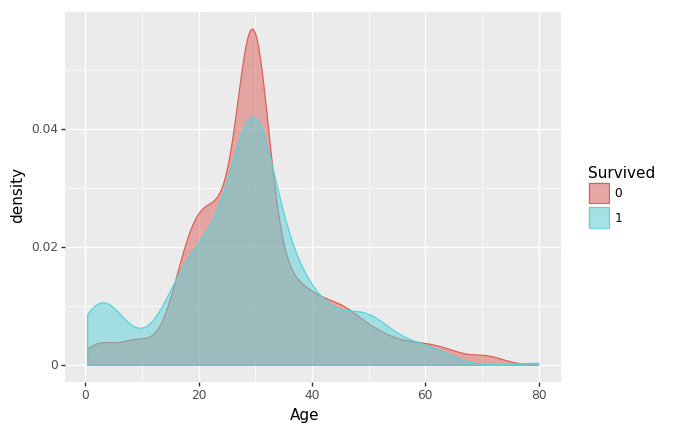

<ggplot: (8743192534469)>

In [90]:
from plotnine import *

ggplot(data, aes(x='Age', color='Survived', fill='Survived')) + geom_density(alpha=0.5)

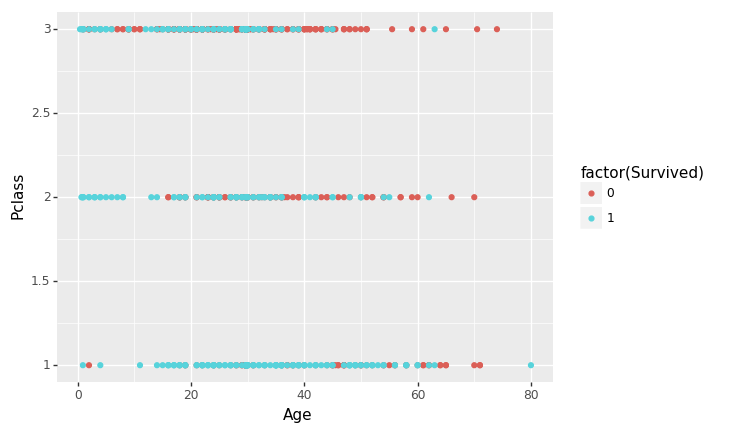

<ggplot: (8743186743374)>


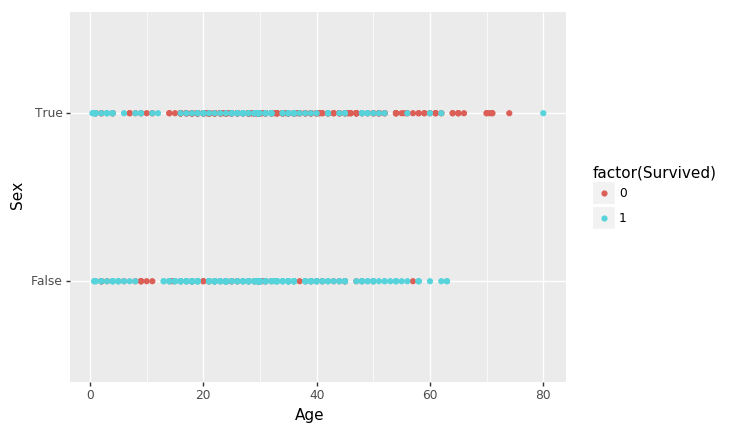

<ggplot: (-9223363293670617312)>


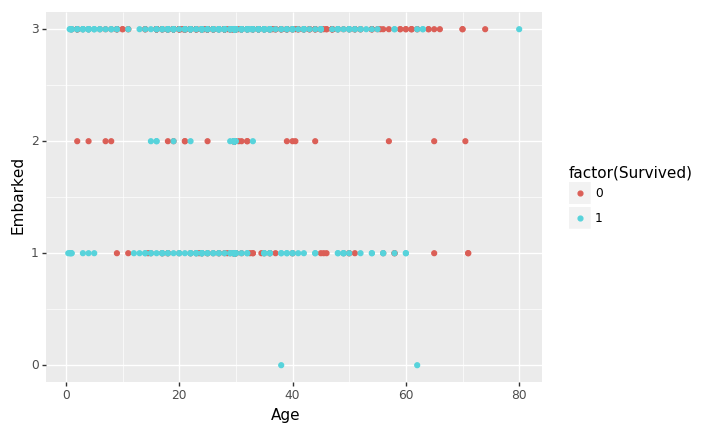

<ggplot: (-9223363293670615734)>


In [91]:
print(ggplot(data, aes(x='Age', y='Pclass')) + geom_point(aes(color='factor(Survived)')))
print(ggplot(data, aes(x='Age', y='Sex')) + geom_point(aes(color='factor(Survived)')))
print(ggplot(data, aes(x='Age', y='Embarked')) + geom_point(aes(color='factor(Survived)')))

In [92]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
rfc.score(X_test, y_test)

0.8888888888888888

In [94]:
from sklearn.svm import SVC

lin_svc = SVC(kernel='linear', gamma='auto')
lin_svc.fit(X_train, y_train)

lin_svc.score(X_test, y_test)

0.8888888888888888

In [95]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30, 90]}
]

forest_reg = RandomForestClassifier()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [3, 10, 30, 90]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [96]:
best_rfc = grid_search.best_estimator_
best_rfc.score(X_test, y_test)

0.8888888888888888

In [97]:
data_unl = pd.read_csv('data/test.csv')

data_unl.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [98]:
data_unl.isna().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [99]:
from sklearn.preprocessing import LabelEncoder

data_unl['Age'] = data_unl['Age'].fillna(avg_age)
data_unl['Fare'] = data_unl['Fare'].fillna(avg_fare)
data_unl['Embarked'] = data_unl['Embarked'].fillna('0')

ordinal_encoder = LabelEncoder()

data_unl['Embarked'] =  ordinal_encoder.fit_transform(data_unl[['Embarked']])

data_unl['Sex'] = (data_unl['Sex'] == 'male')

X_unl = data_unl.drop(columns=['PassengerId', 'Ticket', 'Name', 'Cabin'])

/usr/local/lib/python3.5/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [102]:
y_unl = best_rfc.predict(X_unl)

In [103]:
pred_df = pd.DataFrame({'PassengerId':data_unl['PassengerId'], 'Survived':y_unl})
pred_df.to_csv('result.csv', index=False)